In [10]:
#coding:utf-8
import numpy as np
from matplotlib.pylab import *
from scipy import fftpack
from scipy import ceil, complex64, float64, hamming, zeros
from scipy.io.wavfile import read
%matplotlib inline

In [2]:
def stft(x, win, step):
    l = len(x) # 入力信号の長さ
    N = len(win) # 窓幅
    M = int(ceil(float(l - N + step) / step))
    
    new_x = zeros(N + ((M - 1) * step))
    new_x[: l] = x 
    
    X = zeros([M, N], dtype = complex64) # スペクトログラムの初期化
    for m in range(M):
        start = step * m
        X[m, :] = fft(new_x[start : start + N] * win)
    return X

In [3]:
def istft(X, win, step):
    M, N = X.shape
    assert (len(win) == N), "FFT length and window length are different."

    l = (M - 1) * step + N
    x = zeros(l, dtype = float64)
    wsum = zeros(l, dtype = float64)
    for m in range(M):
        start = step * m
        
        x[start : start + N] = x[start : start + N] + ifft(X[m, :]).real * win
        wsum[start : start + N] += win ** 2 
    pos = (wsum != 0)
    x_pre = x.copy()
    
    ### 窓分のスケール合わせ
    x[pos] /= wsum[pos]
    return x

In [27]:
wavefile = "../wav/loop_89/loop_89.wav"
wr = read(wavefile)
print(wr)

(22050, array([[12587,  9116],
       [12753,  7730],
       [ 8754,  7537],
       ..., 
       [ 1183, -8855],
       [ 4454, -6027],
       [ 4782, -1430]], dtype=int16))


In [24]:
wavefile2 = "../wav/loop_102/loop_102.wav"
wr2 = read(wavefile2)
print(wr2)

(22050, array([[  -1,    0],
       [  12,   11],
       [  17,   21],
       ..., 
       [1690,  738],
       [1667,  683],
       [1636,  633]], dtype=int16))


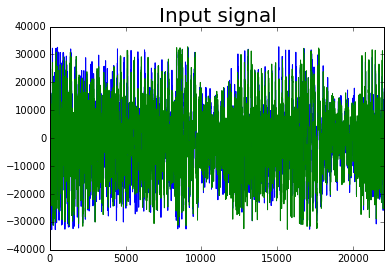

In [28]:
plot(wr[1])
xlim([0,wr[0]])
title("Input signal", fontsize = 20)
show()